<a href="https://colab.research.google.com/github/selaaulia/PCVK_Genap_2022/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from google.colab.patches import cv2_imshow
import glob
from sklearn.neighbors import KNeighborsClassifier # library yang digunakan untuk mengimplementasikan metode knn
from sklearn.metrics import accuracy_score # library yang digunakan untuk menghitung akurasi hasil

In [3]:
# Fungsi untuk load image dari drive lalu resize image menjadi setengah dari image asli, 
# kemudian kumpulan image dimasukkan ke dalam array
def load_image(array_image, path, color):
  for img in glob.glob(path):
    n = cv.imread(img, color)
    
    # mengubah size gambar menjadi setengah ukuran sebenarnya
    scale_percent = 50 # percent of original size
    width = int(n.shape[1] * scale_percent / 100)
    height = int(n.shape[0] * scale_percent / 100)
    dim = (width, height)
    n = cv.resize(n, dim)
    array_image.append(n)
  return array_image

In [4]:
# Load semua dataset
all_daun1 = []
all_daun2 = []
all_daun3 = []
all_image = [all_daun1, all_daun2, all_daun3]

path_daun1 = '/content/drive/MyDrive/POLINEMA/Semester_6/PCVK/Final_Project/Leaf Images 01/Acer_Capillipes/*.jpg'
path_daun2 = '/content/drive/MyDrive/POLINEMA/Semester_6/PCVK/Final_Project/Leaf Images 01/Acer_Circinatum/*.jpg'
path_daun3 = '/content/drive/MyDrive/POLINEMA/Semester_6/PCVK/Final_Project/Leaf Images 01/Castanea_Sativa/*.jpg'
path_image = [path_daun1, path_daun2, path_daun3]

for i in range(3):
  load_image(all_image[i], path_image[i], 0)

In [5]:
# Bagi dataset menjadi 75% data train dari awal dataset
train_daun1 = []
train_daun2 = []
train_daun3 = []
train_image = [train_daun1, train_daun2, train_daun3]

train_size = int(len(all_image[0]) * 0.75)
for i in range(len(all_image)):
  for j in range(train_size):
    train_image[i].append(all_image[i][j])

In [6]:
# Bagi dataset menjadi 25% data test dari akhir dataset
test_daun1 = []
test_daun2 = []
test_daun3 = []
test_daun1_gray = []
test_daun2_gray = []
test_daun3_gray = []
test_images_gray = [test_daun1_gray, test_daun2_gray, test_daun3_gray]
test_images = [test_daun1, test_daun2, test_daun3]

test_size = int(len(all_image[0]) * 0.25)
for i in range(len(all_image)):
  for j in range(train_size, len(all_image[0])):
    test_images_gray[i].append(all_image[i][j])
    test_images[i].append(all_image[i][j])

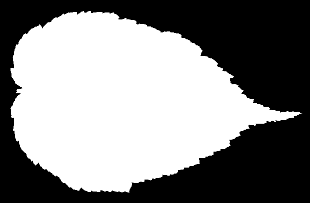

In [7]:
cv2_imshow(train_image[0][1])

In [8]:
# Ekstraksi data dengan deteksi tepi gambar daun menggunakan canny
edged_daun = train_image.copy()
for i in range(len(edged_daun)): #menentukan folder
  for j in range(len(edged_daun[0])): #menentukan gambar train pd folder
    edged_daun[i][j] = cv.Canny(edged_daun[i][j], 30, 200) # 30 untuk batas minimal threshold dan 200 batas maks seperti js 11

edged_test = test_images_gray.copy()
for i in range(len(edged_test)):
  for j in range(len(edged_test[0])):
    edged_test[i][j] = cv.Canny(edged_test[i][j], 30, 200)

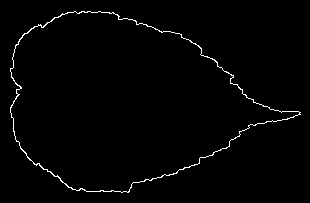

In [9]:
cv2_imshow(edged_daun[0][1])

In [10]:
# Menghitung area daun pada setiap data train
# membuat array untuk menyimpan data yang telah terdeteksi daunnya
area_daun1 = [0] * len(edged_daun[0])
area_daun2 = [0] * len(edged_daun[0])
area_daun3 = [0] * len(edged_daun[0])

for i in range(len(edged_daun)):
  for j in range(len(edged_daun[0])):
    for y in range(edged_daun[i][j].shape[0]):
      for x in range(edged_daun[i][j].shape[1]):
        # mengambil data bernilai lebih dari 0, 1 = putih
        if(edged_daun[i][j][y][x] > 0):
          if(i == 0):
            area_daun1[j] += 1
          elif(i == 1):
            area_daun2[j] += 1
          else:
            area_daun3[j] += 1

In [11]:
# Membuat data train dengan label dari data area bentuk daun
label1 = [0] * len(area_daun1)
label2 = [1] * len(area_daun2)
label3 = [2] * len(area_daun3)

data1 = np.stack((area_daun1, label1), axis=1)
data2 = np.stack((area_daun2, label2), axis=1)
data3 = np.stack((area_daun3, label3), axis=1)

df = pd.DataFrame(data1, columns=["Area", "Label"])
df1 = pd.DataFrame(data2, columns=["Area", "Label"])
df2 = pd.DataFrame(data3, columns=["Area", "Label"])

df = df.append(df1)
df = df.append(df2)

print("Data Train : ")
df

Data Train : 


,Area,Label
0,920,0
1,910,0
2,922,0
3,921,0
4,925,0
5,914,0
6,927,0
7,944,0
8,939,0
9,920,0


In [12]:
# Menentukan dan mengambil x dan y train, x=area, y=label
X_train = df.iloc[:,0].values
X_train = X_train.reshape(-1,1)
Y_train = df.iloc[:,1].values

In [13]:
# Membuat model KNN dan fungsi untuk prediksi daun
# prediksi menggunakan label
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, Y_train)

def prediksi_daun_knn(area):
  prediction = model.predict(area)
  if(prediction == 0):
    prediksi = "Acer_Capillipes"
  elif(prediction == 1):
    prediksi = "Acer_Circinatum"
  else:
    prediksi = "Castanea_Sativa"
  return prediksi

In [14]:
# Menerapkan fungsi findContours() openCV pada data test
contours = [ [ None for y in range( len(edged_test[0]) ) ] for x in range( len(edged_test) ) ]
hierarchy = [ [ None for y in range( len(edged_test[0]) ) ] for x in range( len(edged_test) ) ]
for i in range(len(edged_test)):
  for j in range(len(edged_test[0])):
    test_images[i][j] = cv.cvtColor(test_images[i][j], cv.COLOR_GRAY2RGB)
    contours[i][j], hierarchy[i][j] = cv.findContours(edged_test[i][j], 
        cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    cv.drawContours(test_images[i][j], contours[i][j], -1, (255, 0, 0), 3)

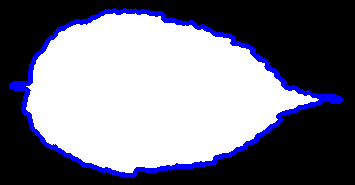

In [15]:
cv2_imshow(test_images[0][1])

In [16]:
# Menghitung area data test
area = [ [ 0 for y in range( len(edged_test[0]) ) ] for x in range( len(edged_test) ) ]

for i in range(len(edged_test)):
  for j in range(len(edged_test[0])):
    for y in range(edged_test[i][j].shape[0]):
      for x in range(edged_test[i][j].shape[1]):
        if(edged_test[i][j][y][x] > 0):
          area[i][j] += 1

In [17]:
# Membuat data test dengan label dari data area bentuk daun
label1 = [0] * len(area[0])
label2 = [1] * len(area[0])
label3 = [2] * len(area[0])

label = np.concatenate((label1, label2))
label = np.concatenate((label, label3))

data = []
for i in range(len(area)):
  for j in range(len(area[0])):
    data.append(area[i][j])

data = np.stack((data, label), axis=1)
df_test = pd.DataFrame(data, columns=["Area", "Label"])
df_test

,Area,Label
0,956,0
1,943,0
2,931,0
3,937,0
4,1404,1
5,1591,1
6,1469,1
7,1527,1
8,2316,2
9,1911,2


In [18]:
# Menentukan X dan Y test
X_test = df_test.iloc[:,0].values
X_test = X_test.reshape(-1,1)
Y_test = df_test.iloc[:,1].values

Model Test Accuracy Score : 
100.0%


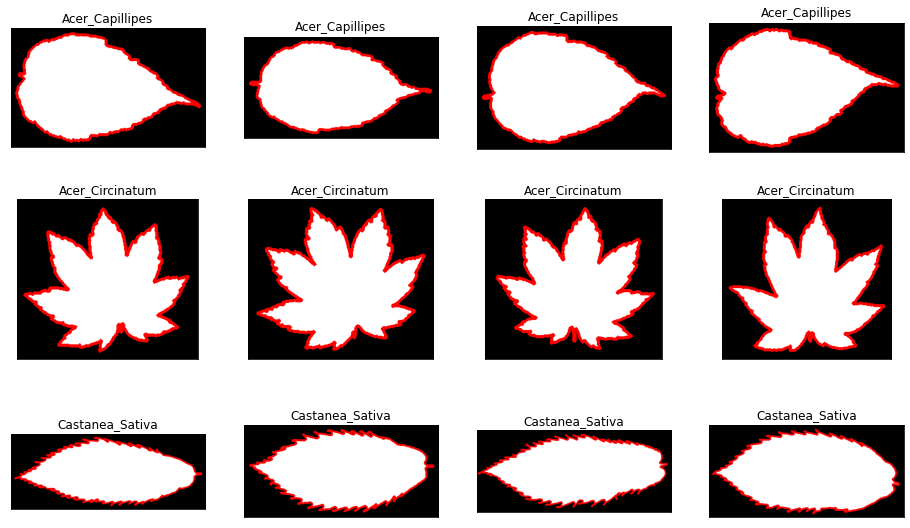

In [19]:
# Prediksi data test menggunakan KNN
prediksi = [ [ "" for y in range( len(edged_test[0]) ) ] for x in range( len(edged_test) ) ]

for i in range(len(prediksi)):
  for j in range(len(prediksi[0])):
    prediksi[i][j] = prediksi_daun_knn([[area[i][j]]])

print('Model Test Accuracy Score : ')
print(str(accuracy_score(Y_test, model.predict(X_test)) * 100)+ '%')

# Membuat figure
fig = plt.figure(figsize=(16, 10))

# setting jumlah baris dan kolom sesuai jumlah citra data tes
rows = 3
columns = 4

# add subplot
index = 1
for i in range(rows):
  for j in range(columns):
    fig.add_subplot(rows, columns, index)
    plt.title(prediksi[i][j])
    plt.imshow(test_images[i][j])
    plt.xticks([]),plt.yticks([]) 
    index += 1
plt.show()